In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

submitted_ma_csv = Path('/mnt/eqa/zhangyuanfeng/methylation/evaluated/submitted_ma_spearmanr.csv')
unified_csv = Path('/mnt/eqa/zhangyuanfeng/methylation/unified_informed/evaluated/c_spearmanr/spearmanr.csv')

unified: pd.DataFrame = (pd.concat([pd.read_csv(submitted_ma_csv), pd.read_csv(unified_csv)])
                           .query('feature == "global" & lab != "NP1"')
                           .drop_duplicates(subset=['lab', 'label'], keep='first')
                           .reset_index(drop=True))
unified['method'] = unified['lab'].str[: 2]
unified

,lab,label,feature,fgroup,count,spearmanr,method
0,MA1,D5,global,global,926841,0.987100,MA
1,MA1,D6,global,global,922149,0.958988,MA
2,MA1,F7,global,global,927853,0.987755,MA
3,MA1,M8,global,global,925363,0.980578,MA
4,MA1,T1,global,global,926818,0.988350,MA
...,...,...,...,...,...,...,...
171,RR1,M8,global,global,4060421,0.930891,RR
172,RR1,T1,global,global,3961425,0.930849,RR
173,RR1,T2,global,global,4343744,0.933114,RR
174,RR1,T3,global,global,3759925,0.941582,RR


In [11]:
unified.groupby(by='method').agg({'spearmanr': ['mean', 'std', 'min', 'max']})

spearmanr                              
            mean       std       min       max
method                                        
BS      0.808436  0.172195  0.191860  0.930436
EM      0.820608  0.194272  0.213330  0.939328
MA      0.974471  0.038260  0.833783  0.995178
PS      0.854476  0.170954  0.291719  0.937296
RM      0.772842  0.231535  0.127933  0.899857
RR      0.868078  0.180188  0.329686  0.941582

<Axes: xlabel='label', ylabel='lab'>

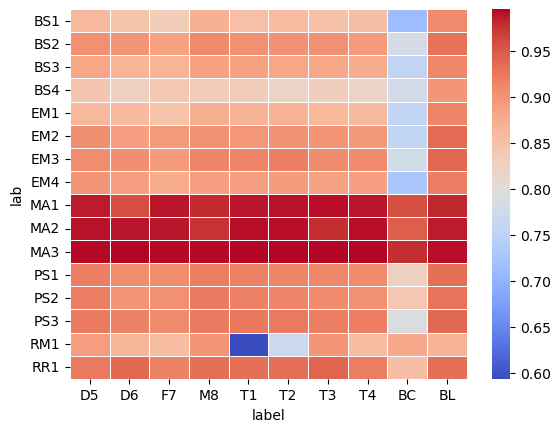

In [12]:
(sns.heatmap(data=unified.pivot(columns='label',
                                index='lab',
                                values='spearmanr')[['D5', 'D6',
                                                'F7', 'M8',
                                                'T1', 'T2',
                                                'T3', 'T4',
                                                'BC', 'BL']],
             cmap='coolwarm', linewidths=.5))

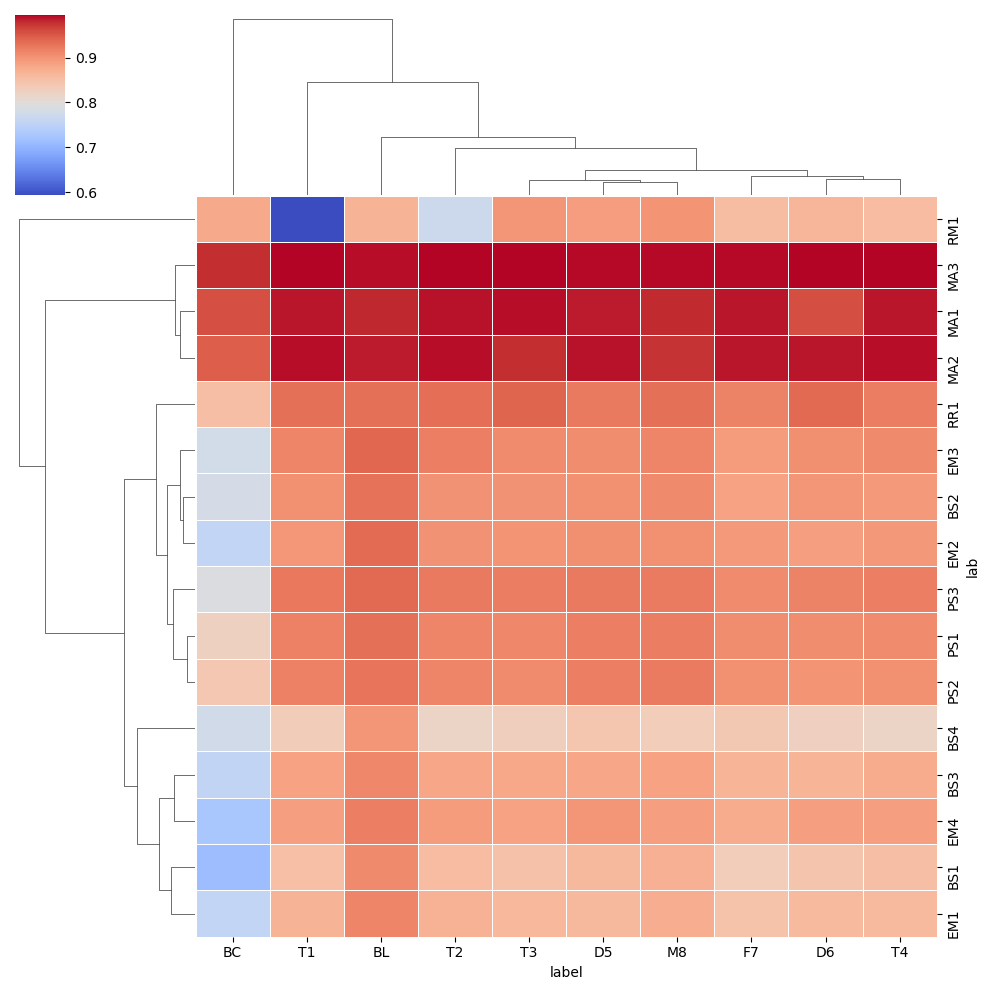

In [13]:
(sns.clustermap(data=unified.query('label != "HF"')
                            .pivot(columns='label',
                                   index='lab',
                                   values='spearmanr'),
                cmap='coolwarm', linewidths=.5))

In [2]:
order_stat = (
    unified.sort_values(by=['label', 'spearmanr'], ascending=[True, False])
           .assign(order=lambda x: x.groupby('label').cumcount())[['lab', 'label', 'order']]
           .pivot(columns='label', index='lab', values='order')
           .assign(total=lambda df: df.sum(axis=1))
           .sort_values(by='total', ascending=True)
)
order_stat[['total'] + [i for i in order_stat.columns if i != 'total']]

label,total,BC,BL,D5,D6,F7,HF,M8,T1,T2,T3,T4
lab,,,,,,,,,,,,
MA3,0,0,0,0,0,0,0,0,0,0,0,0
MA2,14,2,1,1,1,1,1,2,1,1,2,1
MA1,19,1,2,2,2,2,2,1,2,2,1,2
RR1,39,4,6,3,3,3,5,3,3,3,3,3
PS3,47,7,4,4,4,4,4,4,4,4,4,4
PS1,63,6,7,5,5,5,6,6,6,6,5,6
PS2,71,5,9,6,7,6,7,5,5,7,7,7
EM3,75,9,3,7,6,8,12,7,7,5,6,5
BS2,91,8,8,9,8,9,8,8,8,8,8,9


In [3]:
for idx, lab in enumerate(order_stat.index):
    print(idx + 1, lab, order_stat.loc[lab, 'total'], sep='\t')

1	MA3	0
2	MA2	14
3	MA1	19
4	RR1	39
5	PS3	47
6	PS1	63
7	PS2	71
8	EM3	75
9	BS2	91
10	EM2	98
11	EM4	114
12	BS3	127
13	RM1	131
14	EM1	135
15	BS4	144
16	BS1	152


In [21]:
order_stat[order_stat.index.str.contains('BS')]['total'].mean()

128.5

In [20]:
order_stat[order_stat.index.str.contains('EM')]['total'].mean()

105.5

In [19]:
order_stat[order_stat.index.str.contains('PS')]['total'].mean()

60.333333333333336

In [18]:
unified.to_csv(
    '/mnt/eqa/zhangyuanfeng/methylation/data_for_plot/3_quantative_rmse_spearmanr/unified_spearmanr.csv',
    index=False
)